Matplotlib -- это одна из классических библиотек для визуализации данных на Питоне. Посмотрим каким образом она работает

есть два варианта работы matplotlib в jupyter-тетрадке: обычная (```%matplotlib inline```) и интерактивная (```%matplotlib notebook```). 

In [1]:
!pip3 install matplotlib # ячейка установки библиотеки в первый раз

In [5]:
%matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
import math


## визуализация количественных данных

Для начала нарисуем простую кривую: $y=x^2$ (например, по значениям в 40 точках)

Рассчитываем векторы <b>x</b> и <b>y</b>, передаем их первыми двумя параметрами в функцию plot(), которая по умолчанию рисует график в виде линии.

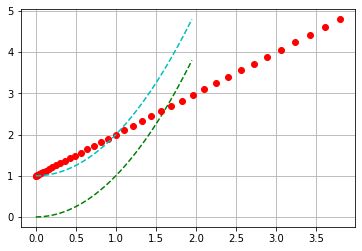

In [50]:
x=[i/20 for i in range(0,40)] # задаем 40 значений х
y=[i*i for i in x] # значения для у зависят от x
z = [i+1 for i in y]

plt.plot(x, y, "g--")
plt.plot(y, z, "ro")
plt.plot(x, z, "c--")

plt.grid()
plt.show()

Поиграем с цветом и формой элементов графика. Пусть это будет не кривая, а набор <font color="red">красных</font> кружочков. (В скобках написаны буквы, которые надо передать в качестве строки; ```r``` означает "red", а ```o``` - это кружочек.)

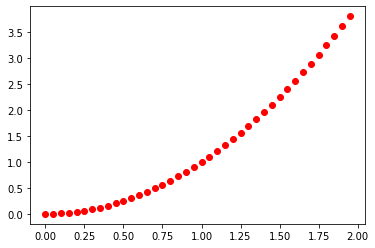

In [24]:
x=[i/20 for i in range(40)]
y=[i*i for i in x]

plt.plot(x, y, "ro")

plt.show()

Или <font color="green"> зеленых</font> (g) треугольников углом вверх (^).

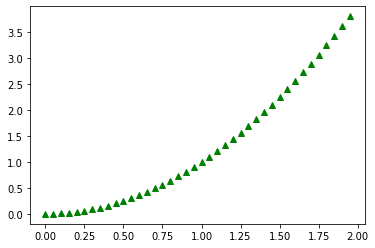

In [5]:
x=[i/20 for i in range(0,40)]
y=[i*i for i in x]

plt.plot(x, y, 'g^')

plt.show()

Теперь нарисуем несколько графиков разными цветами и формами точек (здесь два примера: один использует третий параметр, который сочетает в себе и цвет, и вид штриха; второй передает их разными параметрами - color и marker). 

Заодно добавим сетку - ```plt.grid()```

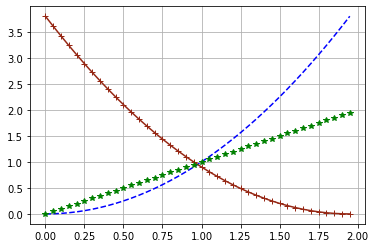

In [6]:
x=[i/20 for i in range(0,40)]
y=[i*i for i in x]

plt.plot(x, y, 'b--')
plt.plot(x, y[::-1], color='#962815', marker='+')
plt.plot(x, x, "g*" )


plt.grid() # задает сетку на графике

plt.show()

*Вот <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot">здесь</a> описаны все варианты задания цветов, точек и формы штриха.*


Теперь добавим легенду. Для этого сперва сохраним наши графики в отдельные переменные ```plot1``` и ```plot2```
Передадим график со всеми аргументами в метод ```plt.legend()```

Аргумент ```loc = 'best'``` означает, что мы просим библиотеку найти лучшее с ее точки зрения размещение легенды.

*Всё о легенде <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend">здесь</a>.*

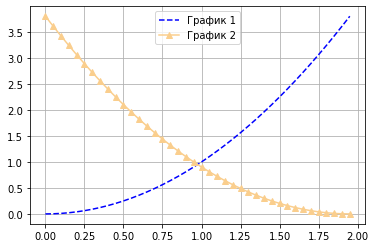

In [53]:
x=[i/20 for i in range(0,40)]
y=[i*i for i in x]

plot1 = plt.plot(x, y, 'b--')[0]
plot2 = plt.plot(x, y[::-1], color='#FACE8D', marker='^')[0]

plt.grid()
plt.legend((plot1, plot2), ("График 1", "График 2"),loc = "best")

plt.show()

Всё то же самое можно получить, добавив метку ```label``` к каждому графику, а потом нарисовать легенду.<br>

Заодно окрасим легенду в другой цвет (<font color='#db94e3'>#db94e3</font>), увеличим размер шрифта (```fontsize=12```), добавим название графика ( ```plt.title()``` ) и название осей (```xlabel()``` и ```ylabel()```).

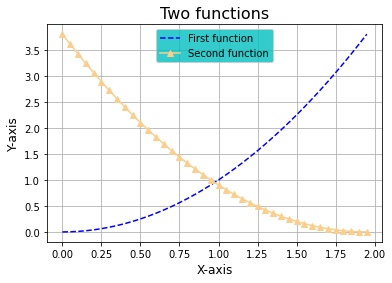

In [65]:
x=[i/20 for i in range(0,40)]
y=[i*i for i in x]

plt.plot(x, y, 'b--', label="First function")
plt.plot(x, y[::-1], color='#FACE8D', marker='^', label="Second function")

plt.title("Two functions", fontsize=16)

plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)

plt.grid()
legend=plt.legend(loc = 'best', fontsize=10)

legend.get_frame().set_facecolor('c')

plt.show()

А теперь давайте попробуем рисовать при помощи функции scatter, которая работает несколько медленнее, но обладает большей функциональностью (см. <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter">здесь</a>).<br>


Так как scatter по определению - это набор точек, которые не должны соединяться между собой, а просто бросаются на плоскость, то отрисовать линию с его помощью не получится. <br>
Также в scatter нельзя передать сразу цвет и вид точки/штриха, поэтому используем параметры color и marker.


Параметр alpha можно применять почти везде. Он показывает степень прозрачности графика, легенды (0 = полностью прозрачен; 1 = абсолютно непрозрачен) 

Помимо этого для каждой из точек можно задавать размер маркера (параметр ```s```,size) и его цвет (параметр ```c```, colour).

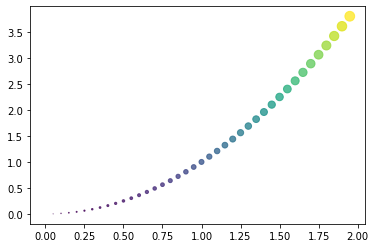

In [72]:
x=[i/20 for i in range(40)]
y=[i*i for i in x]

# зададим листы значений для с и s 
c=[i*i for i in x]

s=[i*i*25 for i in x]
# s = 120 # размер можно сделать статичным

plt.scatter(x, y, c=c, s=s, alpha=0.78) # попробуйте поменять параметры

plt.show()

Цвет графика можно задать при помощи цветовой карты. Для использования стандартных цветовых карт необходимо загрузить их из matplotlib: <br>
```from matplotlib import cm``` <br>

Ту, что больше нравится, стоит присвоить в параметр cmap (мы попробуем ту,которая называется winter)

Также можно создать объект типа Colormap самостоятельно и передать туда же. В этом случае параметр <b>c</b> воспринимается как номер цвета в цветовой схеме, цветовая схема распределяется между минимальным и максимальным значениями.


*А здесь [ссылка с описанием и названиями цветовых карт](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)*

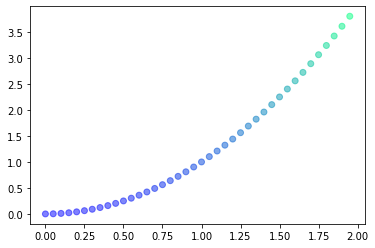

In [10]:
from matplotlib import cm

x=[i/20 for i in range(40)]
y=[i*i for i in x]
c=[i*i for i in x]

plt.scatter(x, y, c=c, alpha=0.5, cmap=cm.winter)

plt.show()

## визуализация категориальных данных

Иногда мы имеем дело с данными, которые выражены не числами. 

Предположим, имя и возраст человека:

Text(0.5, 0.98, 'Categorical Plotting')

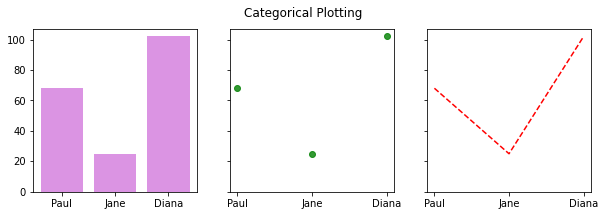

In [11]:
data = {'Paul':68, 'Jane':25, "Diana":102} 
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1,3, figsize=(10, 3), sharey=True)

axs[0].bar(names, values, color = "#db94e3")
axs[1].scatter(names, values, alpha=0.8, color = "green")
axs[2].plot(names, values, "r--")



fig.suptitle('Categorical Plotting')

а как анализировать данные из датафреймов?

### категориальные данные - часть2. Знакомство с seaborn

In [73]:
! pip3 install seaborn

     |████████████████████████████████| 292 kB 977 kB/s            


Установим еще одну библиотеку для визуализаций: seaborn. 

In [74]:
import seaborn as sns

Датафрейм возьмем из нее (методом ```load_dataset()``` внутри которого (строкой) стоит прописать название датасета ([вот они все](https://github.com/mwaskom/seaborn-data))). Это датасет -- с информацией о транзакциях за обеды и ужины, с информацией о поле посетителя, дне недели, размере чаевых и привычке курить.


(Также можно прочитать свой собстенный датасет, импортировав pandas)




In [75]:
# эти строки стоит раскомментить, если возникают проблемы с загрузкой датасета
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

tips = sns.load_dataset("tips")

In [92]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Давайте визуализируем распределения общего счета по дням недели. Для визуализации потребуется метод ```.catplot()```
Заголовки соответвующих ячеек присвоим аргументам ```x``` и ```y```.

Тип отображения (параметр ```kind```)тоже можно менять (попробуйте "point", "bar", "strip", "swarm","box", "violin" или "boxen")

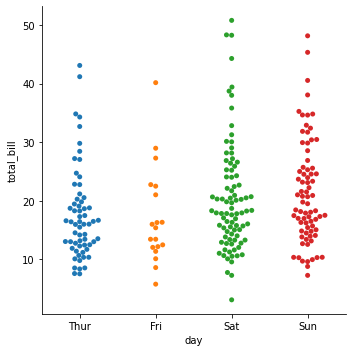

In [84]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

Ниже -- распределение значений итогового счета(ось y) в зависимости от пола (ось x). Дополнительно цветом (параметр ```hue``` )можно закодировать еще одно значение. Например,является ли посетитель курильщиком

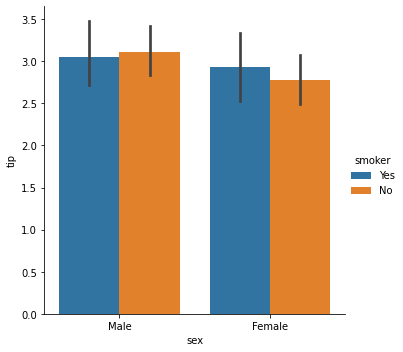

In [108]:
sns.catplot(x="sex", y="total_bill
                       ", hue="smoker", kind="bar", data=tips)

Иногда имеет смысл "перевернуть" оси:

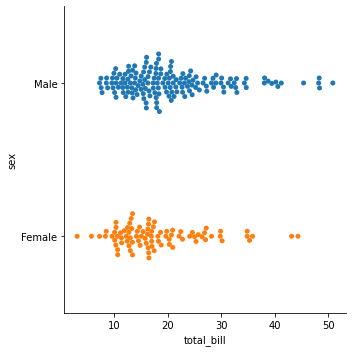

In [19]:
sns.catplot(x="total_bill", y="sex", kind="swarm", data=tips)

А так выглядит распределение размера счета и чаевых. Не очень информативно в плане тегов, но виден общий тренд

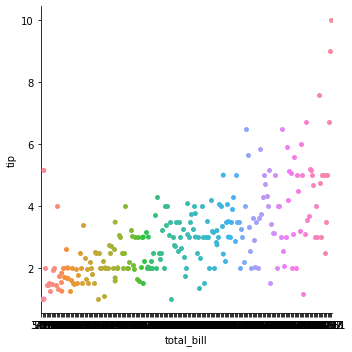

In [18]:
sns.catplot(x="total_bill", y="tip", kind = "strip",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

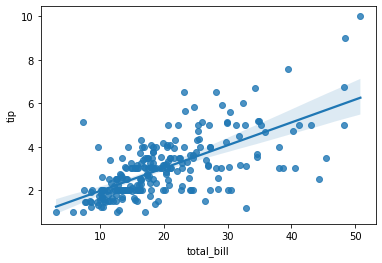

In [110]:
sns.regplot(x="total_bill", y="tip", data=tips)

#### дополнительная секция

а как быть с совершенно категориальными данными? Что если у нас нет чисел?

In [111]:
# импортируем все дополнительное

import numpy as np, pandas as pd
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch

Предположим, у нас есть задача распределить людей по городам, профессиям и музыкальным вкусам:

/var/folders/b6/jlv0gzhn72vdj8t4yttnz9cw0000kt/T/ipykernel_2129/4139175316.py:38: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[a,i].xaxis.set_ticks([])
/var/folders/b6/jlv0gzhn72vdj8t4yttnz9cw0000kt/T/ipykernel_2129/4139175316.py:38: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[a,i].xaxis.set_ticks([])
/var/folders/b6/jlv0gzhn72vdj8t4yttnz9cw0000kt/T/ipykernel_2129/4139175316.py:38: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[a,i].xaxis.set_ticks([])
/var/folders/b6/jlv0gzhn72vdj8t4yttnz9cw0000kt/T/ipykernel_2129/4139175316.py:38: 

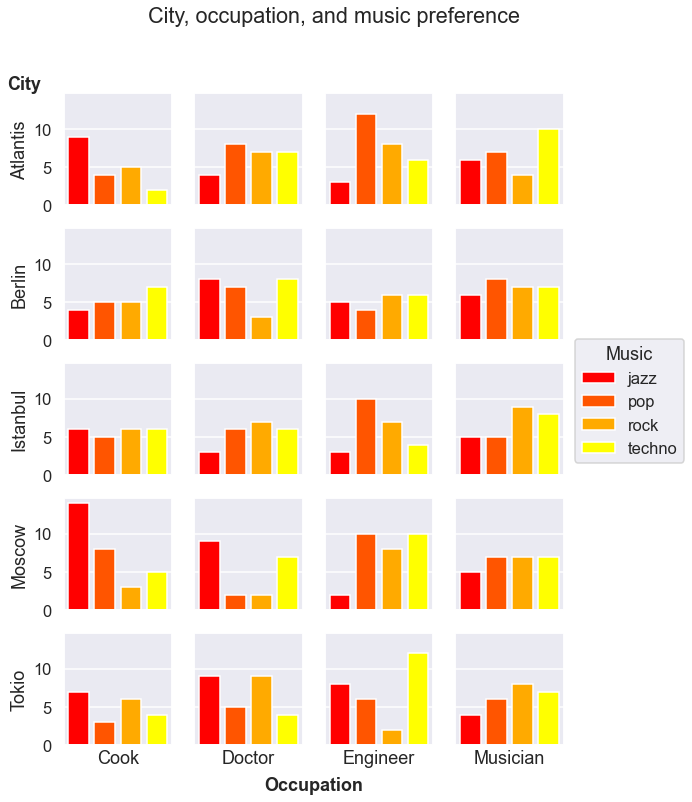

In [112]:
# зададим категории
cities = ['Moscow','Istanbul','Tokio','Berlin','Atlantis']
occupations = ['Doctor','Musician','Engineer','Cook']
music = ['jazz','techno','rock',"pop"]

# зададим датафрейм на 500 строк, рандомными значениями из категорий
df = pd.DataFrame({'City': np.random.choice(cities,500),
                   'Occupation': np.random.choice(occupations,500),
                   'Music':np.random.choice(music,500)})

# преобразуем датафрейм
df['Dummy'] = np.ones(500) 
grouped = df.groupby(by=['City','Occupation','Music']).count().unstack()

# Сохраним список музыкальных предпочтений, позже будем использовать как категории в подграфиках
kinds = grouped.columns.levels[1]

# зададим цветовую схему музыкальным категориям
colors = [get_cmap('autumn')(v) for v in np.linspace(0,1,len(kinds))]

# группируем оставшиеся категории в датафрейме
sns.set(context="talk")
nxplots = len(grouped.index.levels[0]) 
nyplots = len(grouped.index.levels[1]) 

fig, axes = plt.subplots(nxplots,
                         nyplots,
                         sharey=True,
                         sharex=True,
                         figsize=(10,12))

fig.suptitle('City, occupation, and music preference') # задаем название графика

# визуализация
for a, b in enumerate(grouped.index.levels[0]):
    for i, j in enumerate(grouped.index.levels[1]):
        axes[a,i].bar(kinds,grouped.loc[b,j],color=colors)
        axes[a,i].xaxis.set_ticks([])

axeslabels = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
axeslabels.set_ylabel('City',rotation='horizontal',y=1,weight="bold")
axeslabels.set_xlabel('Occupation',weight="bold")

# оси X и Y
for i, j in enumerate(grouped.index.levels[1]):
    axes[nyplots,i].set_xlabel(j)
for i, j in enumerate(grouped.index.levels[0]):
    axes[i,0].set_ylabel(j)

# еще немного поправим легенду
fig.subplots_adjust(right=0.82)

fig.legend([Patch(facecolor = i) for i in colors],
           kinds,
           title="Music",
           loc="center right")


Кто больший любитель техно: токийские повара и берлинские врачи? 🤷‍♀️

*(стоит помнить, что это ненастоящие данные, мы задали их искусственно, для иллюстративных целей, но таким же способом можно визуализировать настоящие)*